In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingUK.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,472,2015-03-06,United Kingdom,51.472087,-0.206380,3.0,1.0,1.0,1.0,120.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
1,473,2013-07-11,United Kingdom,51.501831,-0.221650,2.0,1.0,0.0,1.0,99.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,7
2,474,2016-06-01,United Kingdom,51.484496,-0.206113,2.0,1.0,0.0,1.0,75.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6
3,475,2014-06-05,United Kingdom,51.473387,-0.193706,6.0,4.0,3.0,3.0,350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,6
4,476,2012-02-12,United Kingdom,51.504847,-0.226795,5.0,1.0,2.0,2.0,132.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42686,479112,2014-03-29,United Kingdom,51.518691,-0.140030,4.0,1.0,1.0,2.0,150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,3
42687,479113,2016-06-08,United Kingdom,51.508774,-0.133542,2.0,1.0,1.0,1.0,89.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6
42688,479114,2015-01-22,United Kingdom,51.514946,-0.181393,3.0,1.0,0.0,1.0,71.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
42689,479115,2013-06-09,United Kingdom,51.517585,-0.152908,2.0,2.0,1.0,1.0,45.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,6


<AxesSubplot:ylabel='Frequency'>

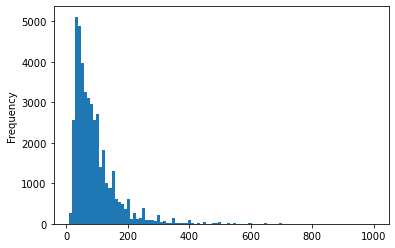

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,472,2015-03-06,United Kingdom,51.472087,-0.206380,3.0,1.0,1.0,1.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3,group_3
1,473,2013-07-11,United Kingdom,51.501831,-0.221650,2.0,1.0,0.0,1.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,7,group_2
2,474,2016-06-01,United Kingdom,51.484496,-0.206113,2.0,1.0,0.0,1.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6,group_2
3,475,2014-06-05,United Kingdom,51.473387,-0.193706,6.0,4.0,3.0,3.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,6,group_5
4,476,2012-02-12,United Kingdom,51.504847,-0.226795,5.0,1.0,2.0,2.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2,group_3


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_2    0.368529
group_1    0.355382
group_3    0.156740
group_4    0.063422
group_5    0.055926
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_2    0.368544
group_1    0.355428
group_3    0.156693
group_4    0.063356
group_5    0.055978
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
36597,402252,2016-02-19,United Kingdom,51.502872,-0.043102,1.0,1.0,1.0,1.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,2
4259,31101,2014-07-29,United Kingdom,51.547369,-0.068724,2.0,1.0,1.0,1.0,93.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7
23464,264398,2016-05-14,United Kingdom,51.539825,-0.154482,5.0,1.0,2.0,2.0,220.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5
7705,78590,2012-12-12,United Kingdom,51.532543,-0.093047,4.0,2.5,2.0,2.0,140.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,12
11830,128411,2013-03-16,United Kingdom,51.566315,-0.080254,2.0,1.0,1.0,1.0,45.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,3


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
7865,51.446735,-0.035198,2.0,1.0,1.0,1.0,33.0,1.0,0.0,3.0,1125.0,41.0,0.0,1.0,0.0,1,7
11820,51.557222,-0.062533,4.0,1.0,2.0,2.0,50.0,1.0,0.0,5.0,1125.0,5.0,1.0,0.0,0.0,4,9
30907,51.492089,-0.137009,3.0,1.0,1.0,2.0,74.0,1.0,20.0,1.0,1125.0,2.0,0.0,1.0,0.0,2,6
26106,51.516128,-0.133354,7.0,2.0,2.0,4.0,349.0,6.0,50.0,1.0,1125.0,179.0,1.0,0.0,0.0,2,9
28428,51.531703,-0.092504,1.0,1.0,1.0,1.0,50.0,1.0,0.0,1.0,1125.0,5.0,0.0,1.0,0.0,0,9


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
36597,35.0
4259,93.0
23464,220.0
7705,140.0
11830,45.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
36597,51.502872,-0.043102,1.0,1.0,1.0,1.0,1.0,0.0,1.0,20.0,9.0,0.0,1.0,0.0,4,2
4259,51.547369,-0.068724,2.0,1.0,1.0,1.0,1.0,0.0,3.0,1125.0,8.0,1.0,0.0,0.0,1,7
23464,51.539825,-0.154482,5.0,1.0,2.0,2.0,1.0,0.0,1.0,1125.0,1.0,1.0,0.0,0.0,5,5
7705,51.532543,-0.093047,4.0,2.5,2.0,2.0,2.0,15.0,2.0,1125.0,20.0,1.0,0.0,0.0,2,12
11830,51.566315,-0.080254,2.0,1.0,1.0,1.0,1.0,0.0,2.0,28.0,171.0,0.0,1.0,0.0,5,3


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
7865,33.0
11820,50.0
30907,74.0
26106,349.0
28428,50.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
7865,51.446735,-0.035198,2.0,1.0,1.0,1.0,1.0,0.0,3.0,1125.0,41.0,0.0,1.0,0.0,1,7
11820,51.557222,-0.062533,4.0,1.0,2.0,2.0,1.0,0.0,5.0,1125.0,5.0,1.0,0.0,0.0,4,9
30907,51.492089,-0.137009,3.0,1.0,1.0,2.0,1.0,20.0,1.0,1125.0,2.0,0.0,1.0,0.0,2,6
26106,51.516128,-0.133354,7.0,2.0,2.0,4.0,6.0,50.0,1.0,1125.0,179.0,1.0,0.0,0.0,2,9
28428,51.531703,-0.092504,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,5.0,0.0,1.0,0.0,0,9


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_16940/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

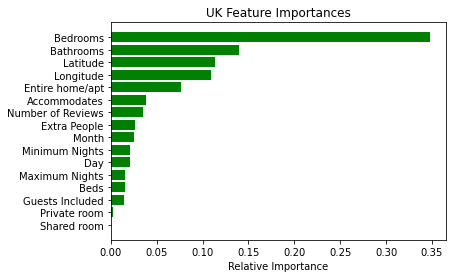

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('UK Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)